# Quiz 01


Mean: 29.962962962962962
Median: 25
Mode: 25
Midrange: 41.5
Q1: 20.5
Q3: 35.0


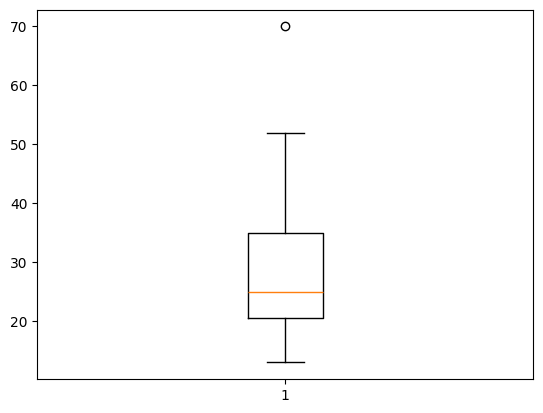

In [2]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Create a list of ages
ages = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25,
        25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

# Calculate the mean
mean = statistics.mean(ages)
print(f"Mean: {mean}")

# Calculate the median
median = statistics.median(ages)
print(f"Median: {median}")

# Find the mode
mode = statistics.mode(ages)
print(f"Mode: {mode}")

# Calculate the midrange
midrange = (max(ages) + min(ages)) / 2
print(f"Midrange: {midrange}")

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(ages, 25)
Q3 = np.percentile(ages, 75)
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

# Draw a boxplot of the data
plt.boxplot(ages)
plt.show()

# Quiz 02


52
Mean: 16.653846153846153
Median: 18.0
Mode: 18
Q1: 11.5
Q3: 21.0


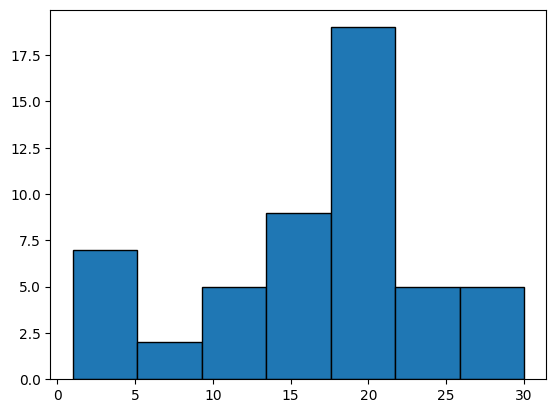

In [6]:

prices = [1, 1, 5, 5, 5, 5, 5, 8, 8, 10, 10, 10, 10, 12, 14, 14, 14, 15, 15, 15, 15, 15, 15, 18, 18, 18,
          18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 25, 25, 25, 25, 25, 28, 28, 30, 30, 30]

# Calculate the mean
print(len(prices))
mean = statistics.mean(prices)
print(f"Mean: {mean}")

# Calculate the median
median = statistics.median(prices)
print(f"Median: {median}")

# Find the mode
mode = statistics.mode(prices)
print(f"Mode: {mode}")

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")

# Draw a histogram of the data
plt.hist(prices, bins=7, edgecolor='black')
plt.show()

# Quiz 3


12.700193878606099
29.962962962962962
Width bins: [array([13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30]), array([33, 33, 35, 35, 35, 35, 36, 40, 45, 46]), array([52])]
Depth bins: [[13, 15, 16, 16, 19, 20, 20, 21, 22], [22, 25, 25, 25, 25, 30, 33, 33, 35], [35, 35, 35, 36, 40, 45, 46, 52, 70]]
Smoothed data: [18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 28.11111111111111, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778, 43.77777777777778]
Outliers: [70]


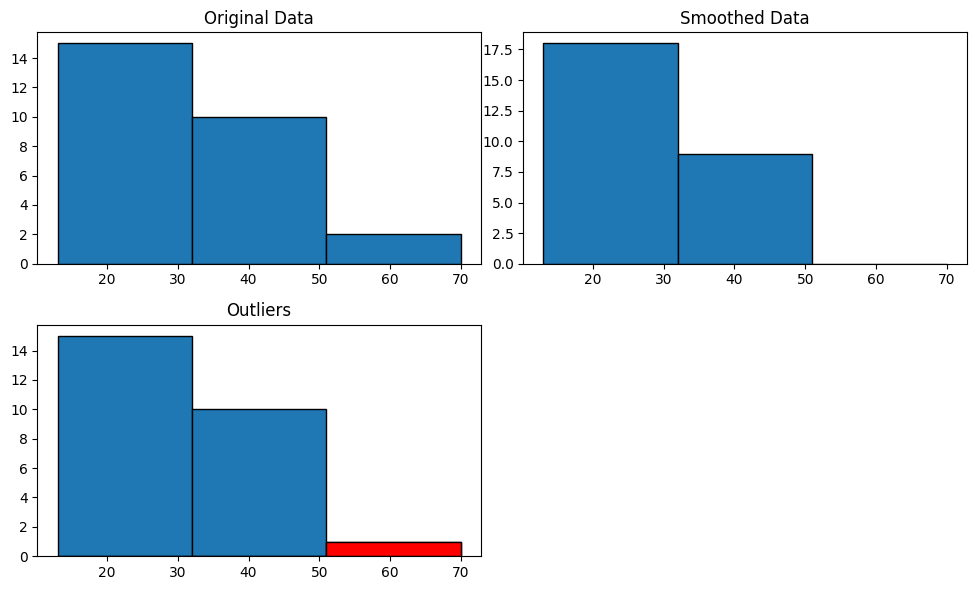

In [11]:
from scipy.spatial import distance

# a. Bin data
data = np.array([13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25,
                25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70])
bins = 3

# Width method
data_range = np.ptp(data)
bin_width = data_range / bins
bins_width = np.arange(min(data), max(data) + bin_width, bin_width)
bins_data = [data[(data >= bins_width[i]) & (data < bins_width[i+1])]
             for i in range(len(bins_width)-1)]

# Depth method
data_sorted = np.sort(data)
bin_depth = np.array_split(data_sorted, bins)

# b. Smoothing by bin means
bin_depth_means = [np.mean(bin) for bin in bin_depth]
data_smoothed = [bin_depth_means[i] for i in range(bins) for _ in bin_depth[i]]

# c. Detect outliers using Euclidean distance
mean = np.mean(data)
std_dev = np.std(data)
distances = [distance.euclidean([mean], [x]) for x in data]
outliers = [x for x, dist in zip(data, distances) if dist > 2 * std_dev]
print(std_dev)
print(mean)


# Result
# Print results
print("Width bins:", bins_data)
print("Depth bins:", [bin.tolist() for bin in bin_depth])
print("Smoothed data:", data_smoothed)
print("Outliers:", outliers)

# Visualize data
plt.figure(figsize=(10, 6))

# Original data
plt.subplot(2, 2, 1)
plt.hist(data, bins=bins_width, edgecolor='black')
plt.title('Original Data')

# Smoothed data
plt.subplot(2, 2, 2)
plt.hist(data_smoothed, bins=bins_width, edgecolor='black')
plt.title('Smoothed Data')

# Outliers
plt.subplot(2, 2, 3)
plt.hist([x for x in data if x not in outliers],
         bins=bins_width, edgecolor='black')
plt.hist(outliers, bins=bins_width, edgecolor='black', color='r')
plt.title('Outliers')

plt.tight_layout()
plt.show()

# Quiz 4

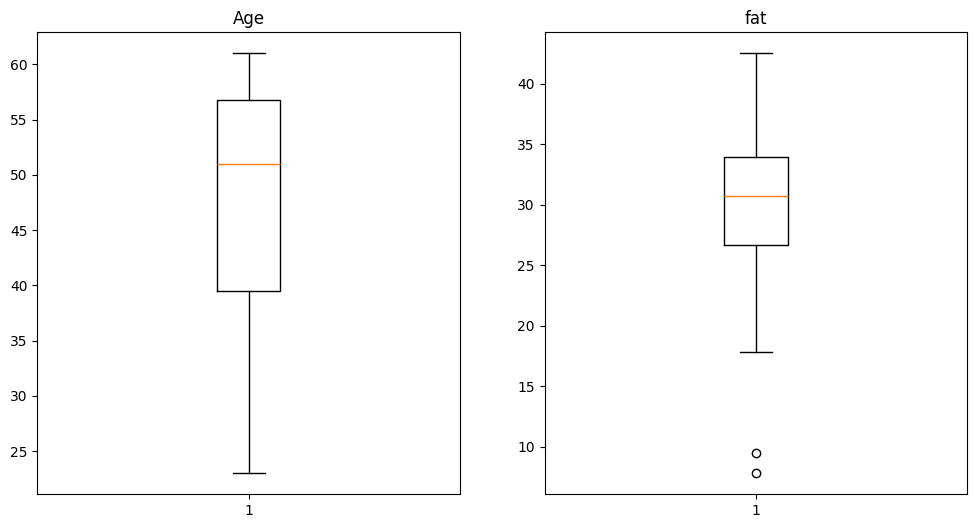

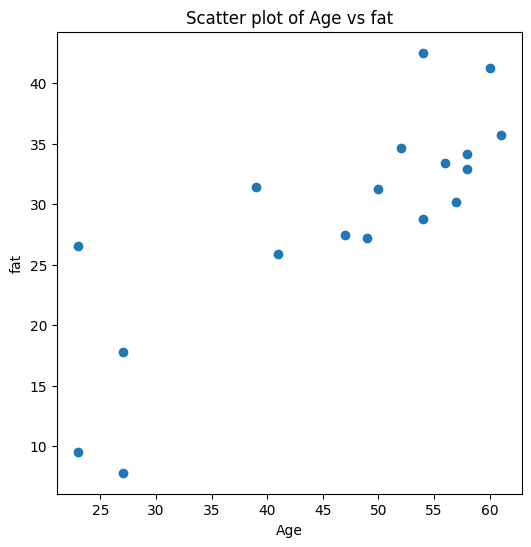

Mean Age:  46.44444444444444
Median Age:  51.0
Standard Deviation of Age:  13.218624215242329
Mean Fat:  28.783333333333335
Median Fat:  30.7
Standard Deviation of Fat:  9.2543948224296
IQR of Age:  17.25
IQR of Fat:  7.2499999999999964


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a dataframe
data = {
    'age': [23, 23, 27, 27, 39, 41, 47, 49, 50, 52, 54, 54, 56, 57, 58, 58, 60, 61],
    'fat': [9.5, 26.5, 7.8, 17.8, 31.4, 25.9, 27.4, 27.2, 31.2, 34.6, 42.5, 28.8, 33.4, 30.2, 34.1, 32.9, 41.2, 35.7]
}
df = pd.DataFrame(data)

mean_age = df['age'].mean()
median_age = df['age'].median()
std_age = df['age'].std()

mean_fat = df['fat'].mean()
median_fat = df['fat'].median()
std_fat = df['fat'].std()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
plt.title('Age')

plt.subplot(1, 2, 2)
plt.boxplot(df['fat'])
plt.title('fat')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(df['age'], df['fat'])
plt.title('Scatter plot of Age vs fat')
plt.xlabel('Age')
plt.ylabel('fat')
plt.show()


# Display
print("Mean Age: ", mean_age)
print("Median Age: ", median_age)
print("Standard Deviation of Age: ", std_age)

print("Mean Fat: ", mean_fat)
print("Median Fat: ", median_fat)
print("Standard Deviation of Fat: ", std_fat)

# Calculate IQR for 'age'
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Calculate IQR for 'fat'
Q1_fat = df['fat'].quantile(0.25)
Q3_fat = df['fat'].quantile(0.75)
IQR_fat = Q3_fat - Q1_fat

# Print the IQRs
print("IQR of Age: ", IQR_age)
print("IQR of Fat: ", IQR_fat)

- Based on the provided plot, it seeems that there is a positive correlation between 'age' and 'fat'. This means that age increases, the fat percentage also tends to increase. However, this relationship may not be pefectly linear, and there are variations at each age.
- There are also some outliers in the data. For example, there are two individuals who are both 23 years old but have different fat percentages(9.5 and 26.5 ). This suggests that there are other factors influencing body fat percentage besides age.

# Quiz 5

Để chuẩn hóa dữ liệu trong khoảng từ 0 đến 1, chúng ta có thể sử dụng phương pháp Min-Max Normalization. Công thức chuẩn hóa Min-Max là:

    X_new = (X - X_min) / (X_max - X_min)

Trong đó:
- X_new là giá trị mới sau khi chuẩn hóa.
- X là giá trị hiện tại cần chuẩn hóa.
- X_min là giá trị nhỏ nhất trong tập dữ liệu.
- X_max là giá trị lớn nhất trong tập dữ liệu.



In [4]:
import pandas as pd

data = {
    'A1': [1.5, 2, 1.6, 1.2, 1.5],
    'A2': [1.7, 1.9, 1.8, 1.5, 1.0]
}
df = pd.DataFrame(data)

df_normalized = (df - df.min()) / (df.max() - df.min())

print(df_normalized)

      A1        A2
0  0.375  0.777778
1  1.000  1.000000
2  0.500  0.888889
3  0.000  0.555556
4  0.375  0.000000
